#Intro To Regression with Neural Networks in TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


#Creating Data To view and fit

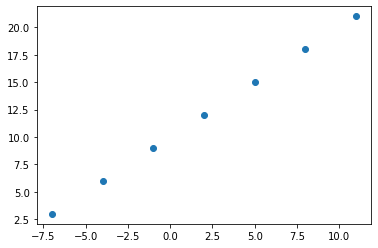

In [ ]:
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0])#sample input features and data
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0])
plt.scatter(X,y) #linear prop data

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True])

#Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([937900])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]


(-4.0, 6.0)

In [ ]:
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

In [ ]:
X, y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

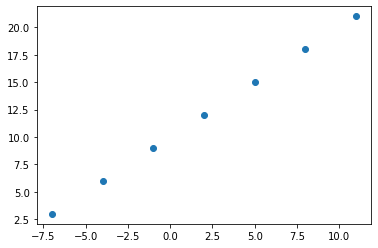

In [ ]:
plt.scatter(X,y)

#Steps in Modelling with TF

#1.Creating a Model:Definining the input and output layers,as well as the hidden layers
#2.Compiling a Model:Defining it's loss function,optimizer and evaluation metrics
#3.Fitting a model:Letting the model try to find patterns between X and y
#(features and labels).
#4.Evaluate the model:On the test data,
#see how reliable our model actually is



In [ ]:
 tf.random.set_seed(42)

 #1.Create a model using the Sequential API
 model=tf.keras.Sequential([tf.keras.layers.Dense(1)]) #Creating a sequential
 #neural net with density defined as 1.

 #2.Compile
 model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"]) 
 #1.Computes the mae between labels and preds
 #2.The optimizer function is stochastic gradient descent,
 #optimizer tells how our neural network should improve.
 #3.Evaluation metrics is the mae.

 model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)
 #Epochs means iterations of the fitting model.

Epoch 1/5
1/1 [==============================] - 0s 229ms/step - loss: 10.8599 - mae: 10.8599
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 10.8099 - mae: 10.8099
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 10.7599 - mae: 10.7599
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 10.7099 - mae: 10.7099
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.6599 - mae: 10.6599


In [ ]:
y==X+10

<tf.Tensor: shape=(7,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True])>

In [ ]:
X,y#

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [ ]:
y_pred=model.predict([17.0]) #Trying to predict y when x is put as 7
y_pred

array([[11.441017]], dtype=float32)

In [ ]:
y_pred + 11

array([[22.441017]], dtype=float32)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
 

#Improving the model's performance
1.Creating a model:Here we might add more layers,increase the number of hidden units
2.Compiling a model:Changing the optimization function,changing the learning rate of the function
3.Fitting a modelLChanging the epochs to more

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.005),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 596ms/step - loss: 12.3294 - mae: 12.3294
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6154 - mae: 10.6154
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 8.8809 - mae: 8.8809
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5089 - mae: 8.5089
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7259 - mae: 8.7259
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 7.9875 - mae: 7.9875
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6234 - mae: 7.6234
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9177 - mae: 7.9177
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.0134 - mae: 8.0134
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8512 - mae: 7.8512
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4766 - mae

In [ ]:
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [ ]:
model.predict([17.0])

array([[27.098822]], dtype=float32)

#Build a model,fit it then evaluate it. tweak a model


In [ ]:
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=X+10
y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

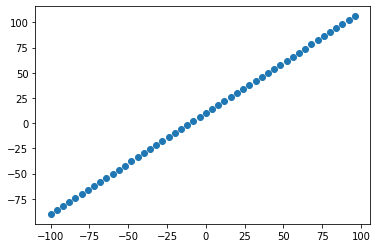

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
X.ndim

1

In [ ]:
tf.shape(X)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([50], dtype=int32)>

In [ ]:
X_train=X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

In [ ]:
tf.shape(X_train)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([40], dtype=int32)>

In [ ]:
len(X_train) ,len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
X_train=X[:40]

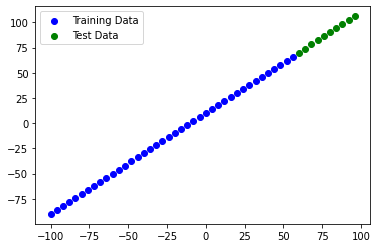

In [ ]:
plt.figure()
plt.scatter(X_train,y_train,c="b",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.legend()

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1],name="input_layer"),#first layer
    tf.keras.layers.Dense(100,input_shape=[1],name="hidden_layer1"),#first hidden layer
    tf.keras.layers.Dense(100,input_shape=[1],name="hidden_layer2"),#second hidden layer
    tf.keras.layers.Dense(1,input_shape=[1],name="output_layer")#output layer
],name="Model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=["mae"])

#model.fit(X_train,y_train,epochs=100)

In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 41.5354 - mae: 41.5354
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8226 - mae: 11.8226
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 20.5646 - mae: 20.5646
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6129 - mae: 13.6129
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 7.7157 - mae: 7.7157
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1415 - mae: 11.1415
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8635 - mae: 8.8635
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1518 - mae: 8.1518
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 8.0501 - mae: 8.0501
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 6.6231 - mae: 6.6231
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - los

In [ ]:
#Create a model that builds automatically

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer1 (Dense)       (None, 100)               200       
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,403
Trainable params: 10,403
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict([-90])

array([[-79.4934]], dtype=float32)

In [ ]:
#Try changing the number of hidden units in the dense layer

In [ ]:
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
from tensorflow.keras.utils import plot_model

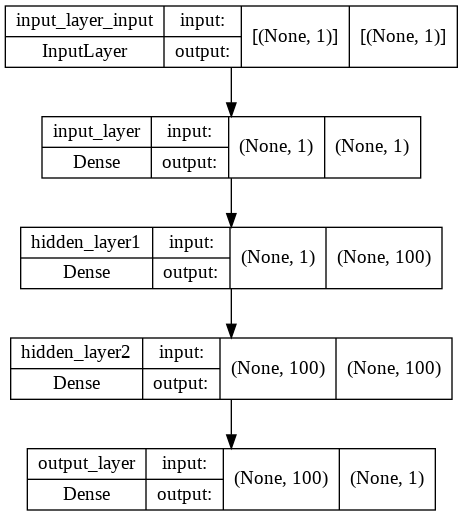

In [ ]:
plot_model(model=model,show_shapes=True)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[ 69.190636],
       [ 73.15554 ],
       [ 77.12045 ],
       [ 81.08536 ],
       [ 85.05027 ],
       [ 89.01517 ],
       [ 92.98008 ],
       [ 96.94498 ],
       [100.9099  ],
       [104.8748  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Creating a plotting function
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,predictions=y_pred):
  """
  Plots training data,test data and compared predictions to the ground truth
  """
  plt.figure(figsize=(10,10))
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  plt.scatter(test_data,test_labels,c="g",label="Test Data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()


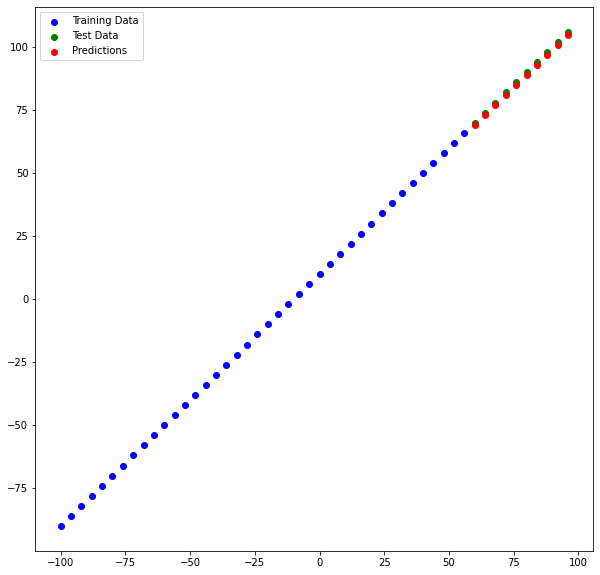

In [ ]:
plot_preds()

In [ ]:
model.evaluate(X_test,y_test)#Net mae of the model on our test data

1/1 [==============================] - 0s 128ms/step - loss: 0.9673 - mae: 0.9673


[0.9672821164131165, 0.9672821164131165]

In [ ]:
tf.keras.losses

<module 'keras.api._v2.keras.losses' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/losses/__init__.py'>

In [ ]:
y_pred#predicted value from our model

array([[ 69.190636],
       [ 73.15554 ],
       [ 77.12045 ],
       [ 81.08536 ],
       [ 85.05027 ],
       [ 89.01517 ],
       [ 92.98008 ],
       [ 96.94498 ],
       [100.9099  ],
       [104.8748  ]], dtype=float32)

In [ ]:
y_pred=tf.squeeze(y_pred)

In [ ]:
y_test#expected ground truth value

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.keras.losses.mean_absolute_error(y_pred=tf.squeeze(y_pred),y_true=y_test)#MAE

<tf.Tensor: shape=(), dtype=float32, numpy=0.9672821>

In [ ]:
tf.keras.losses.MSE(y_pred=tf.squeeze(y_pred),y_true=y_test)#MSE

<tf.Tensor: shape=(), dtype=float32, numpy=0.9457947>

In [ ]:
tf.metrics.mean_squared_error(y_pred=tf.squeeze(y_pred),y_true=y_test)#MSE


<tf.Tensor: shape=(), dtype=float32, numpy=0.9457947>

In [ ]:
def mse(y_true,y_pred):
  return(tf.keras.losses.MSE(y_true=y_true,y_pred=tf.squeeze(y_pred)))

def mae(y_true,y_pred):
  return(tf.keras.losses.MAE(y_true=y_true,y_pred=tf.squeeze(y_pred)))

In [ ]:
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))

tf.Tensor(0.9672821, shape=(), dtype=float32)
tf.Tensor(0.9457947, shape=(), dtype=float32)


In [ ]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)],name="model_1")

model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01
),
              metrics=["mae"])

In [ ]:
model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
mse1=mse(y_test,y_pred)
mae1=mae(y_test,y_pred)

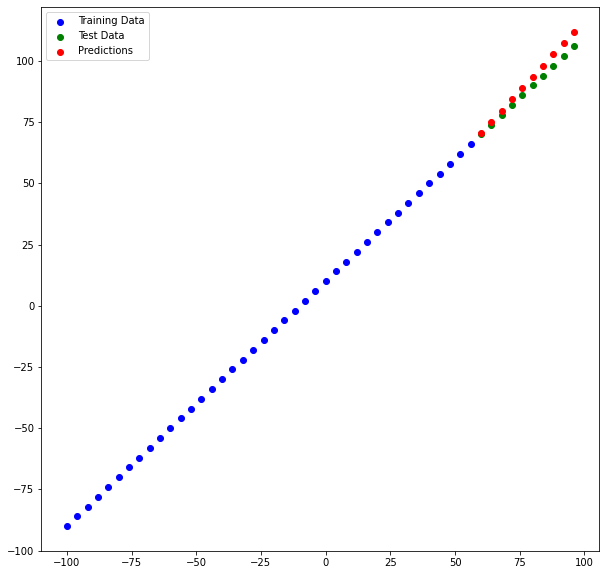

In [ ]:
y_pred_2=model_1.predict(X_test)
plot_preds(predictions=y_pred_2)

In [ ]:
mae2=mae(y_test,y_pred_2)
mse2=mse(y_test,y_pred_2)
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

In [ ]:
plot_preds?


ERROR:root:Exception raised in ColabInspector._getdef
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_inspector.py", line 385, in _getdef
    if v.default != v.empty:
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/constant_op.py", line 102, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
ValueError: Attempt to convert a value (<class 'inspect._empty'>) with an unsupported type (<class 'type'>) to a Tensor.


In [ ]:
y_pred=model_1.predict(X_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mse(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1]),
])

In [ ]:
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

In [ ]:
model_3.fit(X_train,y_train,epochs=10,verbose=0)

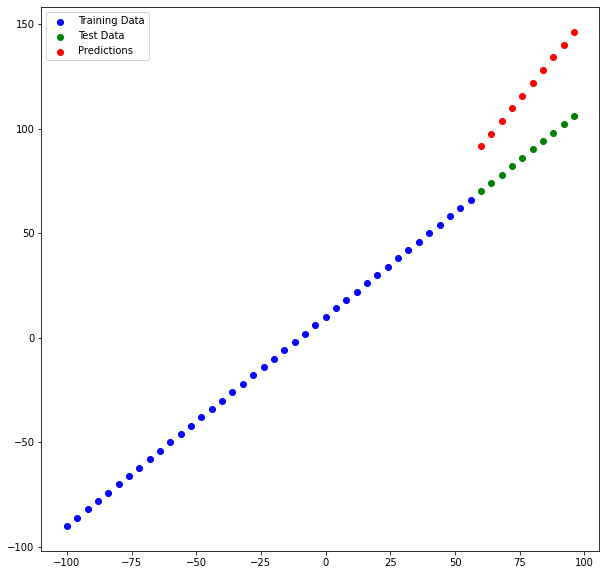

In [ ]:
y_pred_3=model_3.predict(X_test)
plot_preds(predictions=y_pred_3)

In [ ]:
mae3=mae(y_test,y_pred_3)
mse3=mse(y_test,y_pred_3)

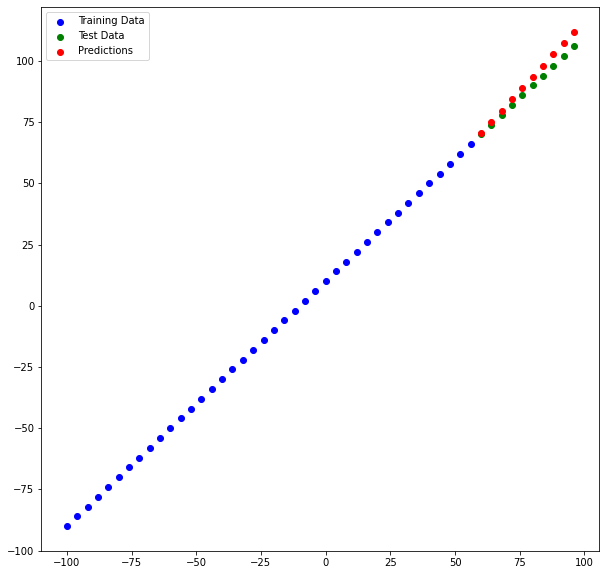

In [ ]:
plot_preds(predictions=y_pred)

In [ ]:
import pandas as pd

model_resuls=[["model_1",mae1.numpy(),mse1.numpy()],
              ["model_2",mae2.numpy(),mse2.numpy()],
              ["model_3",mae3.numpy(),mse3.numpy()]]

all_results=pd.DataFrame(model_resuls,columns=["model","mae","mse"])

In [ ]:
all_results

,model,mae,mse
0,model_1,3.196947,13.070175
1,model_2,3.196947,13.070175
2,model_3,30.816418,985.369995


In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer1 (Dense)       (None, 100)               200       
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,403
Trainable params: 10,403
Non-trainable params: 0
_________________________________________________________________
